In [1]:
#from textblob import TextBlob
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# authenticating
consumerKey = '1Es0Vz7BlYwFPV5H8Y43AnJ8s'
consumerSecret = '2yrM4FNhy9GHEISl2f2cuVDODxHFy2v1EpDwclijBIqrW4rv1x'
accessToken = '823329098-z9jA4X2ZZLW29rObZkfycmVMbR3z9JpBzSg0e084'
accessTokenSecret = 'CdTgNM4t1nMrCEbHjOT99elZMCxU5aa9SRVAx77GfFRvW'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
# input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

Enter Keyword/Tag to search about: Trump
Enter how many tweets to search: 100


In [5]:
# searching for tweets
tweets = []
tweetText = []
tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

In [6]:
# Open/create a file to append data to
csvFile = open('result.csv', 'a')

In [7]:
# Use csv writer
csvWriter = csv.writer(csvFile)

In [8]:
# creating some variables to store info
polarity = 0
positive = 0
wpositive = 0
spositive = 0
negative = 0
wnegative = 0
snegative = 0
neutral = 0

In [9]:
def cleanTweet(tweet):
    # Remove Links, Special Characters etc from tweet
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

# function to calculate percentage
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

def plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
    labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
    sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
    colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [10]:
# iterating through tweets fetched
for tweet in tweets:
    #Append to temp so that we can store in csv later. I use encode UTF-8
    tweetText.append(cleanTweet(tweet.text).encode('utf-8'))
    # print (tweet.text.translate(non_bmp_map))    #print tweet's text
    analysis = TextBlob(tweet.text)
    # print(analysis.sentiment)  # print tweet's polarity
    polarity += analysis.sentiment.polarity  # adding up polarities to find the average later
    if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
        wpositive += 1
    elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
        positive += 1
    elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
        spositive += 1
    elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
        wnegative += 1
    elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
        negative += 1
    elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
        snegative += 1

In [11]:
# Write to csv and close csv file
csvWriter.writerow(tweetText)
csvFile.write('\n')
csvFile.close()

In [12]:
# finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)


In [13]:
# finding average reaction
polarity = polarity / NoOfTerms

How people are reacting on Trump by analyzing 100 tweets.

General Report: 
Weakly Positive

Detailed Report: 
7.00% people thought it was positive
22.00% people thought it was weakly positive
3.00% people thought it was strongly positive
9.00% people thought it was negative
13.00% people thought it was weakly negative
3.00% people thought it was strongly negative
42.00% people thought it was neutral


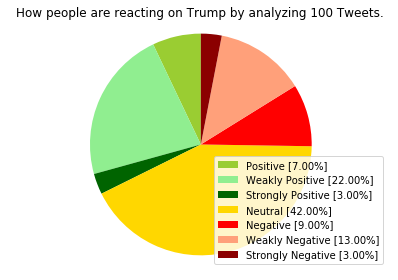

In [14]:
# printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("General Report: ")
if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")
plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)